<div align="center"><h1>
FYS-STK4155 - Project 1 Notebook
</div>
<div align="center"><h2>
Håvard Skåli, Erik Røset and Oskar Idland
</div>
<hr style="border:2px solid gray"> </hr>
<div align="center"><h3>
Part 1: Analysis of the Franke Function
</div>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from functions import FrankeFunction, MSE, OLS, Ridge, Lasso, Bootstrap, kfold_crossval 
plt.rcParams.update({'text.usetex': True, 'font.size': 16, 'font.family': 'serif', 'font.serif': 'Computer Modern Sans Serif', 'font.weight': 100, 'mathtext.fontset': 'cm', 'xtick.labelsize': 14, 'ytick.labelsize': 14})

seed = 43
np.random.seed(seed)

### Plotting the Franke function

#### Many data points and no noise

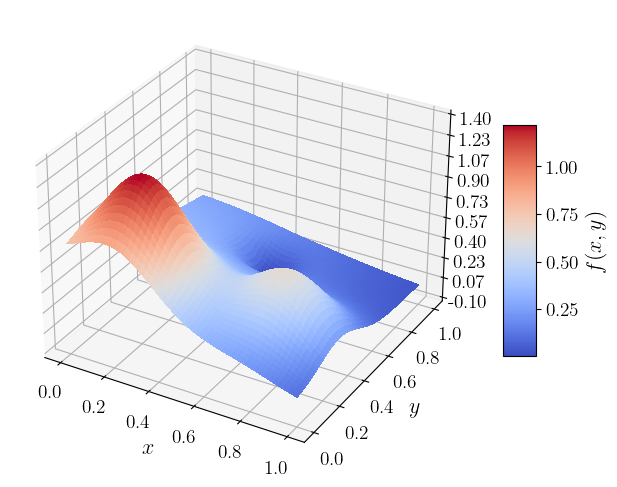

In [21]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(projection="3d")

N = 2000
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
x, y = np.meshgrid(x, y)

z = FrankeFunction(x, y)
surf = ax.plot_surface(x, y, z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
fig.colorbar(surf, shrink = 0.5, aspect = 7, label = r"$f(x,y)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
# plt.savefig("../figs/Franke.pdf")
plt.show()

#### $50\times50$ grid with added noise

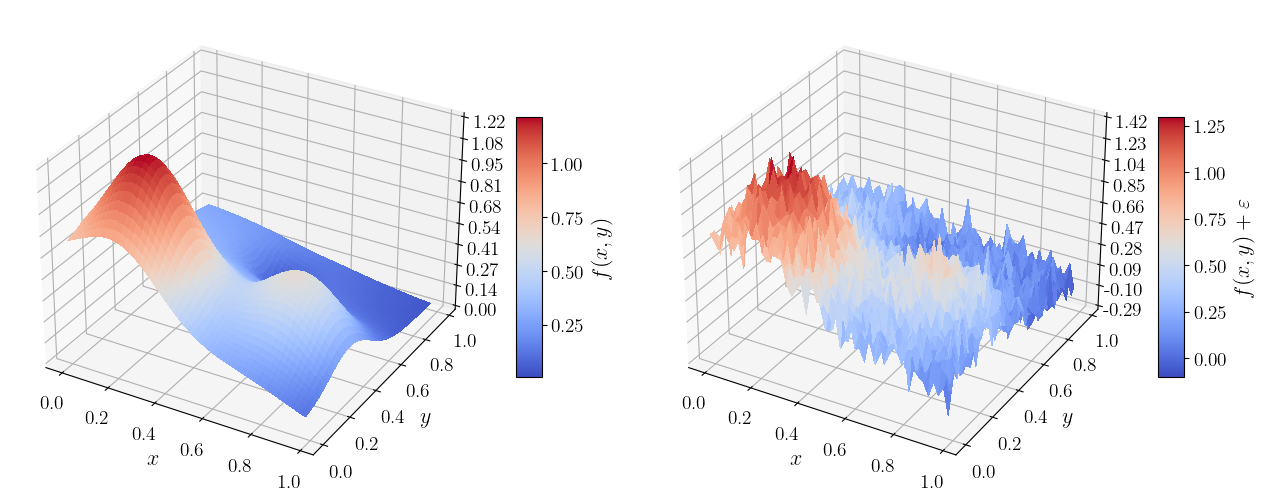

In [20]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
x, y = np.meshgrid(x, y)

z = FrankeFunction(x, y)

fig = plt.figure(figsize = (13, 7))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf = axs[0].plot_surface(x, y, z, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
surf_noise = axs[1].plot_surface(x, y, z + np.random.normal(0, 0.1, (N, N)), cmap = cm.coolwarm, linewidth = 0, antialiased = False)
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$")
    axs[i].set_ylabel(r"$y$")
fig.colorbar(surf, shrink = 0.4, aspect = 10, label = r"$f(x,y)$")
fig.colorbar(surf_noise, shrink = 0.4, aspect = 10, label = r"$f(x,y)+\varepsilon$")
plt.tight_layout()
# plt.savefig("../figs/a_Franke_surf.pdf")
plt.show()

### OLS: MSE and $R^2$ as function of polynomial degree for scaled and raw data

In [12]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

MSE_raw_list = []
MSE_scaled_list = []
R2_raw_list = []
R2_scaled_list = []
β_raw_list = []
β_scaled_list = []

degrees = range(1, 7)
for degree in degrees:
    # Raw
    MSE_raw, R2_raw, β_raw = OLS(x, y, z, degree, scale = False, seed = seed, return_beta = True)
    
    MSE_raw_list.append(MSE_raw)
    R2_raw_list.append(R2_raw)
    β_raw_list.append(β_raw)
    
    # Scaled
    MSE_scaled, R2_scaled, β_scaled = OLS(x, y, z, degree, seed = seed, return_beta = True)
    
    MSE_scaled_list.append(MSE_scaled)
    R2_scaled_list.append(R2_scaled)
    β_scaled_list.append(β_scaled)

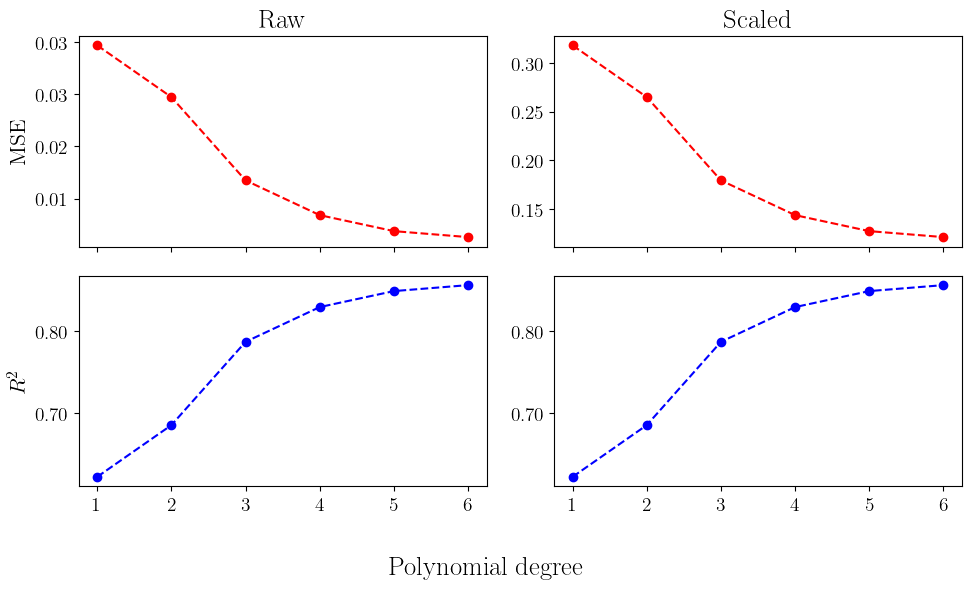

MSE(R2_raw, R_scaled) = 1.28e-21


In [13]:
markers = ["r--o", "b--o"]
titles = ["Raw", "Scaled"]
ylabels = ["MSE", r"$R^2$"]
values = np.array([[MSE_raw_list, MSE_scaled_list], [R2_raw_list, R2_scaled_list]])

# Plotting in grid
fig, axs = plt.subplots(2, 2, sharex = True, figsize = (10, 6))
for i in range(2):
    axs[i, 0].set_ylabel(ylabels[i])
    for j in range(2):
        axs[i, j].plot(degrees, values[i, j], markers[i])
        if i == 0:
            axs[i, j].set_title(titles[j])
        # Prettifying
        axs[i, j].yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
fig.supxlabel('Polynomial degree')
plt.tight_layout()
# plt.savefig("../figs/a_error_scaled_vs_raw.pdf")
plt.show()

print(f"MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw_list), np.array(R2_scaled_list)):.2e}") # Almost equal

### OLS: Raw vs. scaled $\beta$ values

MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00


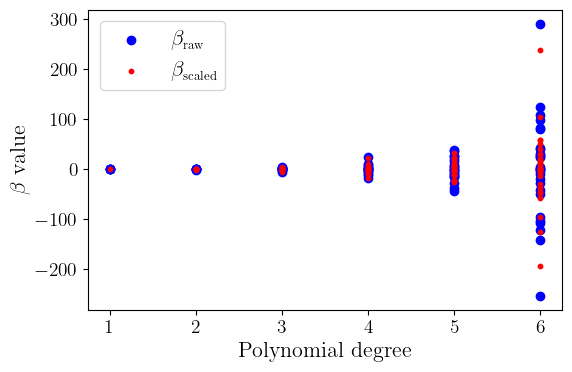

In [21]:
plt.figure(figsize = (6, 4))
for i, deg in enumerate(degrees):
    diff = MSE(β_raw_list[i][:, 0], β_raw_list[i][:, -1])   # Comparing first and last row
    print(f'MSE between first and last row: {diff: .2e}')
    m = len(β_raw_list[i][:, 0])                            # Choice of row in β makes basically no difference
    plt.scatter([deg]*m, β_raw_list[i][:, 0], c = "blue")
    plt.scatter([deg]*m, β_scaled_list[i][:, 0], s = 10, c = "red")

# Single data point for labels
plt.scatter(1, β_raw_list[0][0, 0], c = "blue", label = r"$\beta_{\small\textrm{raw}}$")
plt.scatter(1, β_scaled_list[0][0, 0], s = 10, c = "red", label = r"$\beta_{\small\textrm{scaled}}$")

plt.xlabel("Polynomial degree")
plt.ylabel(r"$\beta$ value")
plt.xticks([i for i in degrees], [str(i) for i in degrees])
plt.legend()
plt.tight_layout()
# plt.savefig("../figs/a_beta_scaled_vs_raw.pdf")
plt.show()

### Ridge: MSE and $R^2$ as function of hyperparameter $\lambda$ and polynomial degree

In [3]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-5, 1, 30)
degrees = range(1, 42, 2)

MSE_Ridge = np.zeros((len(degrees), len(lambdas)))
R2_Ridge = np.zeros((len(degrees), len(lambdas)))
for i in range(len(degrees)):
    for j in range(len(lambdas)):
        MSE_Ridge_val, R2_Ridge_val = Ridge(x, y, z, degrees[i], lambdas[j], seed = seed)
        MSE_Ridge[i, j] = MSE_Ridge_val
        R2_Ridge[i, j] = R2_Ridge_val

#### Plotting

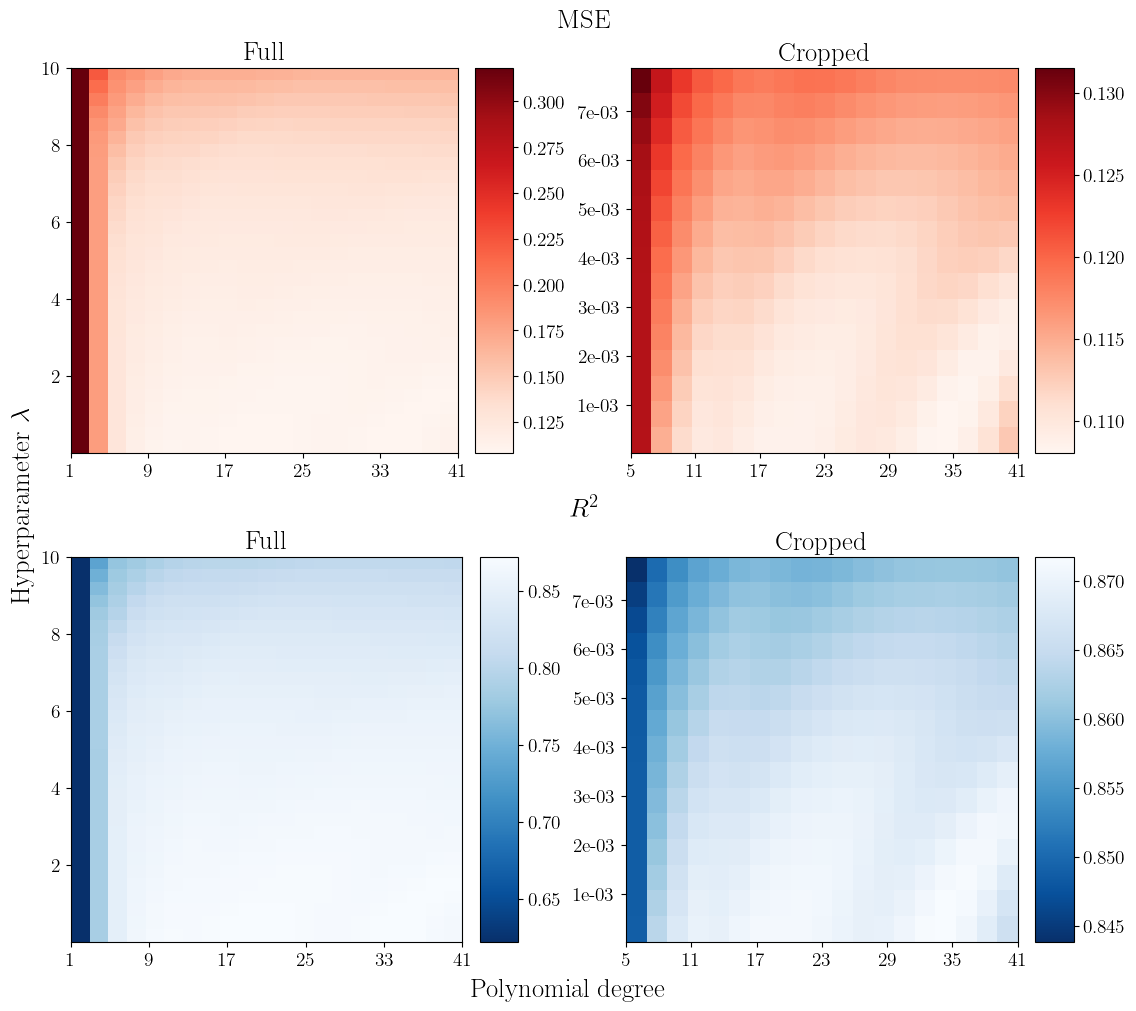

In [4]:
values = [MSE_Ridge, R2_Ridge]
suptitles = ["MSE", r"$R^2$"]
titles = ["Full", "Cropped"]
cmaps = ["Reds", "Blues_r"]
extents = [[np.min(degrees), np.max(degrees), np.min(lambdas), np.max(lambdas)], [np.min(degrees[2:]), np.max(degrees[2:]), np.min(lambdas[:15]), np.max(lambdas[:15])]]

fig = plt.figure(figsize = (11.25, 10), constrained_layout = True)
subfigs = fig.subfigures(2, 1)
im = []
for i in range(2):
    axs = subfigs[i].subplots(1, 2)
    subfigs[i].suptitle(suptitles[i])
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.0e"))
    for j in range(2):
        im.append(axs[j].imshow(values[i].T[:15, 2:][::-1] if j == 1 else values[i].T[::-1], cmap = cmaps[i], aspect = "auto", extent = extents[j]))
        plt.colorbar(im[-1], ax = axs[j], pad = 0.02, aspect = 10)
        axs[j].set_xticks(degrees[::4] if j == 0 else degrees[2:][::3])
        axs[j].set_title(titles[j])
fig.supxlabel("Polynomial degree")
fig.supylabel(r"Hyperparameter $\lambda$")
# plt.savefig("../figs/b_MSE_R2.pdf")
plt.show()

### Lasso: MSE and $R^2$ as function of hyperparameter $\lambda$ and polynomial degree

In [5]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-5, 1, 30)
degrees = range(1, 42, 4)

MSE_Lasso = np.zeros((len(degrees), len(lambdas)))
R2_Lasso = np.zeros((len(degrees), len(lambdas)))
for i in range(len(degrees)):
    for j in range(len(lambdas)):
        MSE_Lasso_val, R2_Lasso_val, = Lasso(x, y, z, degrees[i], lambdas[j], seed = seed)
        MSE_Lasso[i, j] = MSE_Lasso_val
        R2_Lasso[i, j] = R2_Lasso_val

#### Plotting

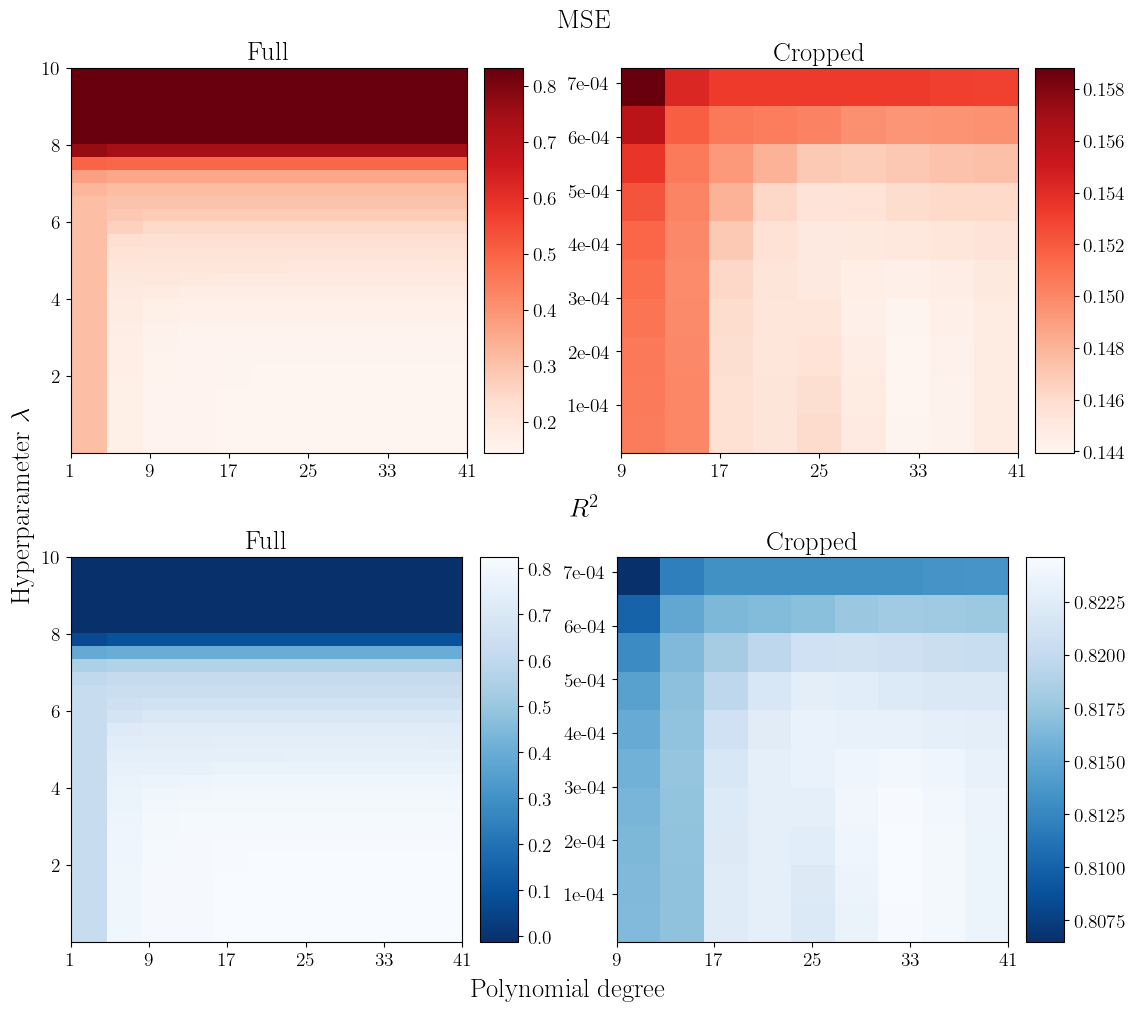

In [6]:
values = [MSE_Lasso, R2_Lasso]
suptitles = ["MSE", r"$R^2$"]
titles = ["Full", "Cropped"]
ylabels = ["Logarithmic scale", "Linear scale"]
cmaps = ["Reds", "Blues_r"]
extents = [[np.min(degrees), np.max(degrees), np.min(lambdas), np.max(lambdas)], [np.min(degrees[2:]), np.max(degrees[2:]), np.min(lambdas[:10]), np.max(lambdas[:10])]]

fig = plt.figure(figsize = (11.25, 10), constrained_layout = True)
subfigs = fig.subfigures(2, 1)
im = []
for i in range(2):
    axs = subfigs[i].subplots(1, 2)
    subfigs[i].suptitle(suptitles[i])
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.0e"))
    for j in range(2):
        im.append(axs[j].imshow(values[i].T[:10, 2:][::-1] if j == 1 else values[i].T[::-1], cmap = cmaps[i], aspect = "auto", extent = extents[j]))
        plt.colorbar(im[-1], ax = axs[j], pad = 0.02, aspect = 10)
        axs[j].set_xticks(degrees[::2] if j == 0 else degrees[2:][::2])
        axs[j].set_title(titles[j])
fig.supxlabel("Polynomial degree")
fig.supylabel(r"Hyperparameter $\lambda$")
# plt.savefig("../figs/c_MSE_R2.pdf")
plt.show()

### MSE on training and test set as functions of polynomial degree (to recreate fig. 2.11 in Hastie et al.)

In [11]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

MSE_test = []
MSE_train = []

degrees = range(1, 82, 4)
for degree in degrees:
    MSE_test_val, R2_test_val, β, X_train, X_test, z_train, z_test = OLS(x, y, z, degree, return_beta = True, return_train_test = True)
    z_tilde = X_train @ β 
    
    MSE_train.append(MSE(z_train, z_tilde))
    MSE_test.append(MSE_test_val)

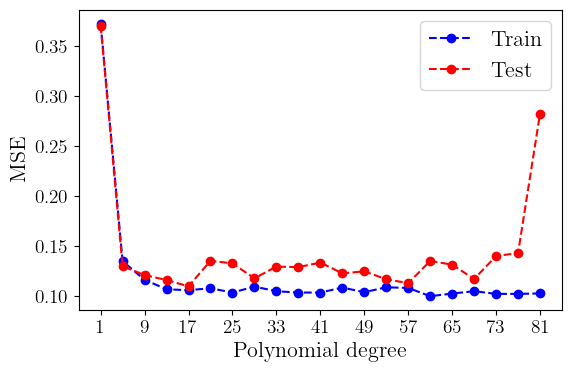

In [12]:
fig = plt.figure(figsize = (6, 4))

# Plotting in grid
plt.plot(degrees, MSE_train, "b--o", label = "Train")
plt.plot(degrees, MSE_test, "r--o", label = "Test")
plt.legend()

# Axis labels
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.xticks(degrees[::2])

plt.tight_layout()
# plt.savefig("../figs/e_MSE_train_test.pdf")
plt.show()

### MSE, bias and variance as functions of polynomial degree, number of data points, number of bootstrap steps and test fraction

In [157]:
# Use underscores so they don't get overwritten by the loops in the next cells
degree_ = 5
N_ = 50
n_bootstraps_ = 100
test_size_ = 0.2

degrees = range(1, 42, 2)
N_vals = np.array([10, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 1000])
n_bootstraps_vals = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
test_sizes = np.arange(0.05, 0.96, 0.05)

# Add to nested list to make plotting easier
variables = [[degrees, N_vals], [n_bootstraps_vals, test_sizes]]

In [158]:
# Use nested lists here for same reason
error = [[np.zeros(len(degrees)), np.zeros(len(N_vals))], [np.zeros(len(n_bootstraps_vals)), np.zeros(len(test_sizes))]]
bias = [[np.zeros(len(degrees)), np.zeros(len(N_vals))], [np.zeros(len(n_bootstraps_vals)), np.zeros(len(test_sizes))]]
variance = [[np.zeros(len(degrees)), np.zeros(len(N_vals))], [np.zeros(len(n_bootstraps_vals)), np.zeros(len(test_sizes))]]

#### Polynomial degree: $50$ data points, $100$ bootstrap steps, test fraction $0.2$ 

In [159]:
x = np.arange(0, 1, 1/N_)
y = np.arange(0, 1, 1/N_)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N_, N_))).reshape(-1, 1) 

for i, degree in enumerate(degrees):
    error[0][0][i], bias[0][0][i], variance[0][0][i] = Bootstrap(x, y, z, degree, n_bootstraps_, test_size = test_size_, seed = seed)

#### Number of data points: Polynomial degree $5$, $100$ bootstrap steps, test fraction $0.2$ 

In [160]:
for i, N in enumerate(N_vals):
    x = np.arange(0, 1, 1/N)
    y = np.arange(0, 1, 1/N)
    xx, yy = np.meshgrid(x, y)
    x.reshape(-1, 1); y.reshape(-1, 1) 
    z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 
    error[0][1][i], bias[0][1][i], variance[0][1][i] = Bootstrap(x, y, z, degree_, n_bootstraps_, test_size = test_size_, seed = seed)

#### Number of bootstrap steps: Polynomial degree $5$, $50$ data points, test fraction $0.2$ 

In [161]:
x = np.arange(0, 1, 1/N_)
y = np.arange(0, 1, 1/N_)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N_, N_))).reshape(-1, 1) 

for i, n_bootstraps in enumerate(n_bootstraps_vals):
    error[1][0][i], bias[1][0][i], variance[1][0][i] = Bootstrap(x, y, z, degree_, n_bootstraps, test_size = test_size_, seed = seed)

#### Test fraction: Polynomial degree $5$, $50$ data points, $100$ bootstrap steps

In [162]:
x = np.arange(0, 1, 1/N_)
y = np.arange(0, 1, 1/N_)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N_, N_))).reshape(-1, 1) 

degree_ = 5
for i, test_size in enumerate(test_sizes):
    error[1][1][i], bias[1][1][i], variance[1][1][i] = Bootstrap(x, y, z, degree_, n_bootstraps_, test_size = test_size, seed = seed)

#### Plotting

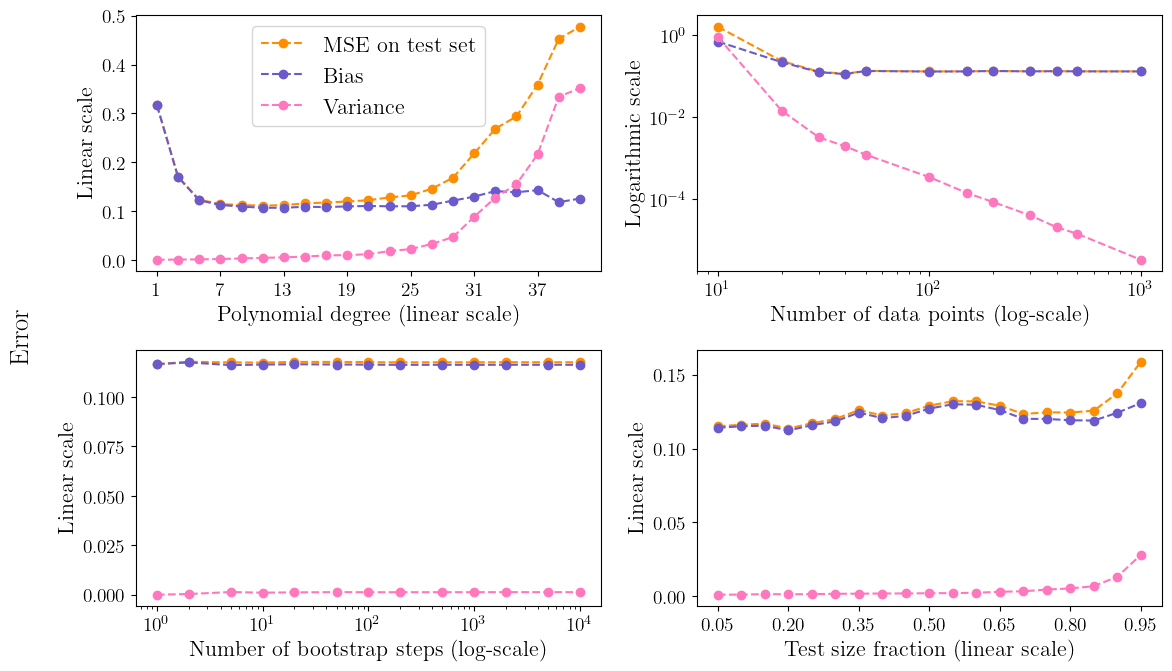

In [163]:
xlabels = [["Polynomial degree (linear scale)", "Number of data points (log-scale)"], ["Number of bootstrap steps (log-scale)", "Test size fraction (linear scale)"]]

# Plotting in grid
fig, axs = plt.subplots(2, 2, figsize = (12, 7))

for i in range(2):
    for j in range(2):
        axs[i, j].plot(variables[i][j], error[i][j], label = "MSE on test set", linestyle = "--", marker = "o", color = "#ff8d00")
        axs[i, j].plot(variables[i][j], bias[i][j], label = "Bias", linestyle = "--", marker = "o", color = "slateblue")
        axs[i, j].plot(variables[i][j], variance[i][j], label = "Variance", linestyle = "--", marker = "o", color = "#ff77bc")
        axs[i, j].set_xlabel(xlabels[i][j])
        axs[i, j].set_ylabel("Logarithmic scale" if i == 0 and j == 1 else "Linear scale")

axs[0, 0].legend()
axs[0, 0].set_xticks(degrees[::3])
axs[0, 1].set_xscale("log"); axs[0, 1].set_yscale("log")
axs[1, 0].set_xscale("log")
axs[1, 1].set_xticks(test_sizes[::3])

fig.supylabel("Error")
plt.tight_layout()
# plt.savefig("../figs/e_bias_variance.pdf")
plt.show()

### OLS: Cross-validation performance as function of complexity and $k$, vs. bootstrap as function of complexity

In [3]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

n_bootstraps = 100
degrees = range(1, 16)
k = range(5, 16)

MSE_kfold = np.zeros((len(degrees), len(k)))
MSE_bootstrap = np.zeros(len(degrees))
for i in range(len(degrees)):
    MSE_bootstrap[i], bias, variance = Bootstrap(x, y, z, degrees[i], n_bootstraps, seed = seed)
    for j in range(len(k)):
        MSE_kfold[i, j] = kfold_crossval(x, y, z, k[j], LinearRegression(fit_intercept = False), degrees[i], seed = seed)

#### Plotting

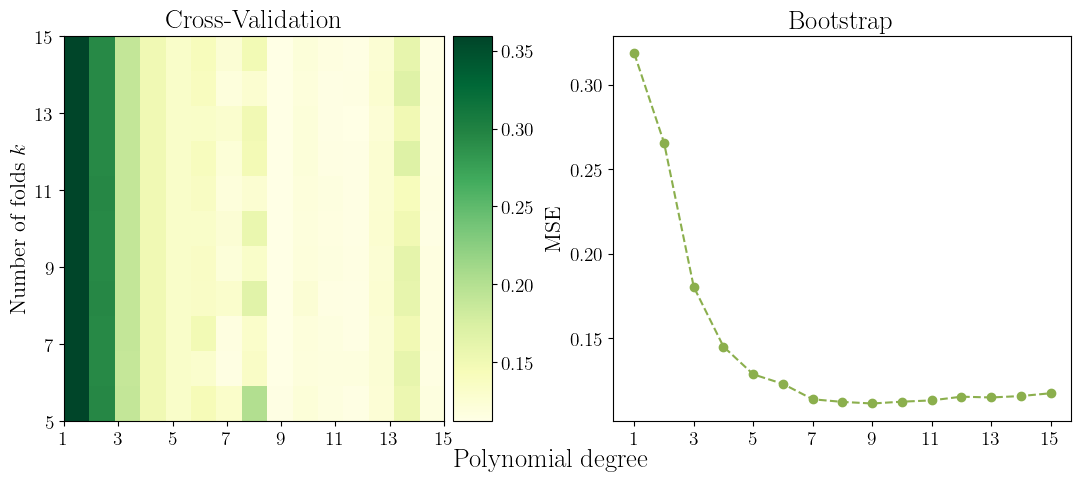

In [4]:
fig, axs = plt.subplots(1, 2, figsize = (13, 5))
im = axs[0].imshow(MSE_kfold.T[::-1], cmap = "YlGn", aspect = "auto", extent = [np.min(degrees), np.max(degrees), np.min(k), np.max(k)])
plt.colorbar(im, ax = axs[0], pad = 0.02, aspect = 10)
axs[1].plot(degrees, MSE_bootstrap, "--o", color = "#8baf4d")
axs[0].set_xticks(degrees[::2])
axs[1].set_xticks(degrees[::2])
axs[0].set_yticks(k[::2])
axs[0].set_ylabel(r"Number of folds $k$")
axs[1].set_ylabel("MSE")
axs[0].set_title("Cross-Validation")
axs[1].set_title("Bootstrap")
fig.supxlabel("Polynomial degree")
plt.tight_layout
# plt.savefig("../figs/f_kfold_vs_bootstrap.pdf")
plt.show()

### Ridge and Lasso MSE as functions of complexity and number of folds $k$

In [9]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = [0.001, 0.5]
degrees = range(1, 16)
k = range(5, 16)

MSE_Ridge, MSE_Lasso = np.zeros((len(degrees), len(k), len(lambdas))), np.zeros((len(degrees), len(k), len(lambdas)))
for i in range(len(degrees)):
    for j in range(len(k)):
        for l in range(len(lambdas)):
            MSE_Ridge[i, j, l] = kfold_crossval(x, y, z, k[j], linear_model.Ridge(lambdas[l], fit_intercept = False), degrees[i], seed = seed)
            MSE_Lasso[i, j, l] = kfold_crossval(x, y, z, k[j], linear_model.Lasso(lambdas[l], fit_intercept = False), degrees[i], seed = seed)

#### Plotting

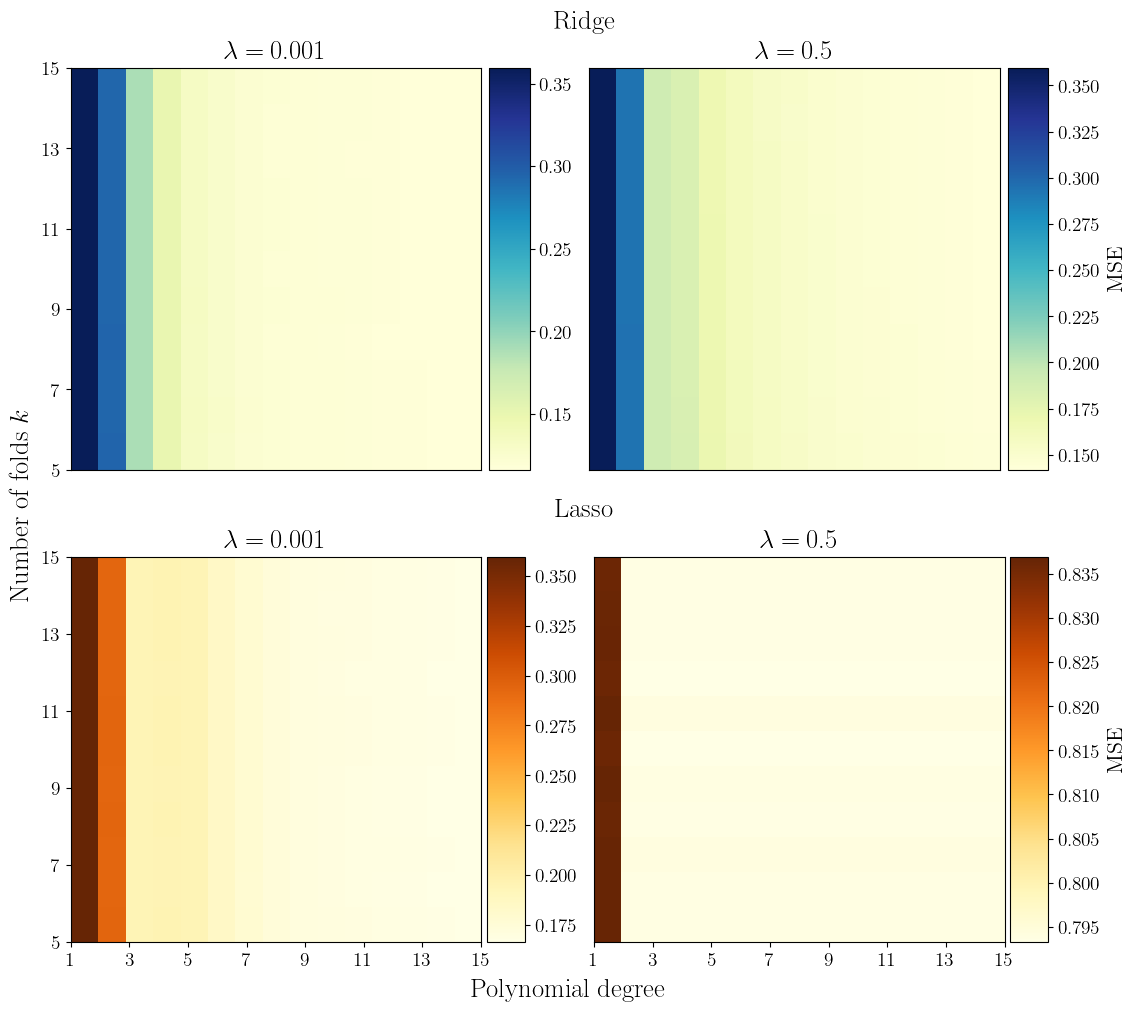

In [10]:
suptitles = ["Ridge", "Lasso"]
titles = [[r"$\lambda=\:$" + f"{lambdas[0]}", r"$\lambda=\:$" + f"{lambdas[1]}"], [r"$\lambda=\:$" + f"{lambdas[0]}", r"$\lambda=\:$" + f"{lambdas[1]}"]]
cmaps = ["YlGnBu", "YlOrBr"]
pads = [0.02, -0.01]
values = [MSE_Ridge, MSE_Lasso]

fig = plt.figure(figsize = (11.25, 10), constrained_layout = True)
subfigs = fig.subfigures(2, 1)
im = []
for i in range(2):
    axs = subfigs[i].subplots(1, 2)
    subfigs[i].suptitle(suptitles[i])
    for j in range(2):
        im.append(axs[j].imshow(values[i][:, :, j].T[::-1], cmap = cmaps[i], aspect = "auto", extent = [np.min(degrees), np.max(degrees), np.min(k), np.max(k)]))
        plt.colorbar(im[-1], ax = axs[j], pad = pads[i], aspect = 10, label = "MSE" if j == 1 else None)
        axs[j].set_title(titles[i][j])
        axs[j].set_xticks(degrees[::2] if i == 1 else [])
        axs[j].set_yticks(k[::2] if j == 0 else [])

fig.supxlabel("Polynomial degree")
fig.supylabel(r"Number of folds $k$")
# plt.savefig("../figs/f_Ridge_Lasso.pdf")
plt.show()